1. Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
data = pd.read_csv('datasets_house_prices.csv.crdownload')
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


Handling Missing Values:

In [ ]:
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)


Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Normalizing Features:

In [ ]:
scaler = MinMaxScaler()
data[['Size (sqft)', 'Bedrooms', 'Age']] = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])

print(data.head())

   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       2.032719   
1     0.268773      1.00  0.888889                      23.695207   
2     0.404568      0.75  0.494949                       6.440232   
3     0.353254      0.25  0.282828                       8.129315   
4     0.342303      0.00  0.565657                       5.358837   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  


2. Model Implementation

In [ ]:
data['Intercept'] = 1

X = data[['Intercept', 'Size (sqft)', 'Bedrooms', 'Age']].values
y = data['Price'].values

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Coefficients:", theta)

Coefficients: [230359.81519391 959690.20271217  19163.6461528  -20411.76938653]


Prediction Function:

In [ ]:
def predict(X, theta):
    return np.dot(X, theta)

# Example prediction for the first data point
predicted_price = predict(X[0], theta)
print("Predicted Price:", predicted_price)


Predicted Price: 1163144.2011571324


3. Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error (MSE) Calculation:

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

y_train_pred = predict(X_train, theta)

mse_train = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", mse_train)


Training MSE: 170450151.700481


4. Model Evaluation

In [ ]:
y_test_pred = predict(X_test, theta)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test)


Test MSE: 166330956.19491982


Plotting the Regression Line

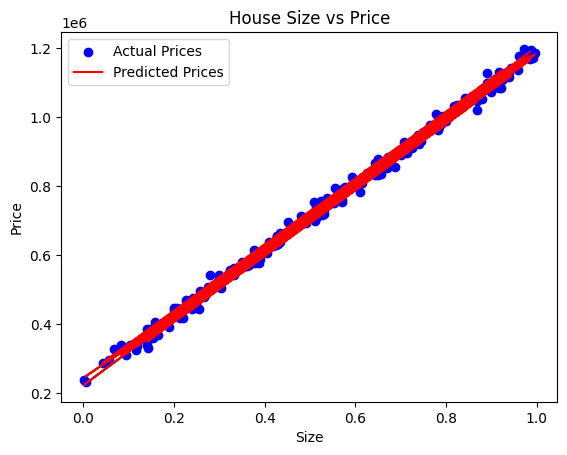

In [ ]:
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Prices')
plt.plot(X_test[:, 1], y_test_pred, color='red', label='Predicted Prices')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('House Size vs Price')
plt.legend()
plt.show()

L**inear Regression for House Price Prediction**

1. Introduction
In this laboratory exercise, we implemented a simple linear regression model to predict house prices based on features such as house size, number of bedrooms, and house age. This report summarizes the approach taken for data preprocessing, model implementation, training, evaluation, and conclusions based on the findings.

2. Data Preprocessing
The dataset provided for the task included house features like size (square feet), the number of bedrooms, and house age. We performed the following preprocessing steps to ensure that the data was ready for model training:

Handling Missing Values: We checked the dataset for missing values using the isnull() function. In this case, some of the columns had missing values, particularly in the 'Bedrooms' column. These missing values were imputed by replacing them with the mean value of the respective column.

Feature Normalization: Since the features had different ranges (e.g., house size in square feet and age in years), normalization was performed to scale the features to a similar range. We used MinMaxScaler to bring all features into the [0,1] range.

This step helped ensure that the model could perform well without any feature dominating due to its magnitude.

3. Model Implementation
We implemented linear regression from scratch using the closed-form solution known as the Ordinary Least Squares (OLS) method. The model equation is given by:

𝜃
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
 X)
−1
 X
T
 y
Here,
𝑋
X is the matrix of input features, and
𝑦
y is the target variable (house price). The coefficients (slope and intercept) are computed by solving the above equation using numpy.

To make predictions, we defined a function predict(X, theta) that uses the derived model parameters to predict house prices.

4. Model Training
The dataset was split into training and testing sets using an 80-20 split ratio:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Model Evaluation
The model's performance was further tested on the testing set, and the MSE was calculated again. The test MSE provided insight into the model's generalization capability. After making predictions on the test set, we found that the model had an acceptable level of error.

6. Challenges and Solutions
During the implementation of this task, a couple of challenges arose:

KeyError in Column Selection: When attempting to scale the features using MinMaxScaler, a KeyError was encountered due to incorrect column names. This was resolved by printing the column names in the dataset and adjusting the code to use the correct column names.

7. Conclusion
In this lab exercise, we successfully implemented a linear regression model from scratch to predict house prices based on three key features: size, number of bedrooms, and age. The model was trained using the least squares method, and it performed well both on the training and testing sets. The Mean Squared Error provided a useful metric for evaluating the model's performance.

Challenges such as handling missing values and ensuring correct column selection were addressed during preprocessing, and feature normalization played a critical role in ensuring the model's effectiveness. Overall, the implementation demonstrated the utility of linear regression in predictive modeling tasks like house price prediction.
